#Library Preparation

In [ ]:
!pip install sastrawi
!pip install newspaper3k
!pip install swifter
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 3.9 MB/s 
     |████████████████████████████████| 81 kB 10.5 MB/s 
     |████████████████████████████████| 93 kB 2.3 MB/s 
     |████████████████████████████████| 7.4 MB 20.5 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=68e2f8d33420430b0abc0d8a7becf16562bf55e5a8fd24f7df6b781a2d42b513
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=991d08396076493158344cadcb125de4740f6b1073e050f6196cbc9c19659e0c
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 408 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=c8f0d03408cafee9a80eafcf9c3040d465aedb3a72c436ff6701e287d9a7b638
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import datetime
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as vad
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import newspaper
from plotly.offline import iplot
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
import swifter
import string 
import re
import matplotlib.cm as cm
from textblob import TextBlob

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

#Data Preparation

In [ ]:
reshuffle = pd.read_excel('/content/reshuffle.xlsx')

In [ ]:
reshuffle['title'] = reshuffle['title'].astype(str)
reshuffle['content'] = reshuffle['content'].astype(str)

In [ ]:
reshuffle['date'] = pd.to_datetime(reshuffle['published']).dt.to_period('D')

In [ ]:
reshuffle.head()

,source,author,title,description,url,urlToImage,published,content,date
0,"{'id': None, 'name': 'Viva.co.id'}",Daurina Lestari,Reshuffle Kabinet Jokowi Dapat Sorotan Media A...,Media Amerika Serikat yakni US News menuliskan...,https://www.viva.co.id/berita/dunia/1485645-re...,https://thumb.viva.co.id/media/frontend/thumbs...,2022-06-15 11:07:05,"VIVA – Presiden Republik Indonesia, Joko Widod...",2022-06-15
1,"{'id': None, 'name': 'Viva.co.id'}",Fikri Halim,Ramai Kabar Reshuffle Kabinet Pertengahan Juni...,Mensesneg Pratikno buka suara mengenai kabar r...,https://www.viva.co.id/berita/nasional/1480959...,https://thumb.viva.co.id/media/frontend/thumbs...,2022-06-02 12:48:27,VIVA – Menteri Sekretaris Negara (Mensesneg) P...,2022-06-02
2,"{'id': None, 'name': 'Viva.co.id'}",Dusep Malik,"Soal Reshuffle, Seskab: Hari Ini, Besok atau L...","Berita Soal Reshuffle, Seskab: Hari Ini, Besok...",https://www.viva.co.id/berita/nasional/1485162...,https://thumb.viva.co.id/media/frontend/thumbs...,2022-06-14 10:44:23,VIVA – Isu perombakan kabinetnya atau reshuffl...,2022-06-14
3,"{'id': None, 'name': 'Viva.co.id'}",Lis Yuliawati,"Isu Reshuffle Menguat, Prabowo Mendadak Datang...","Berita Isu Reshuffle Menguat, Prabowo Mendadak...",https://www.viva.co.id/berita/nasional/1485202...,https://thumb.viva.co.id/media/frontend/thumbs...,2022-06-14 12:02:25,VIVA – Sejumlah menteri terlihat mendatangi Is...,2022-06-14
4,"{'id': None, 'name': 'Viva.co.id'}",Dedi,Daftar Menteri Jokowi Kabinet Indonesia Maju 2...,Menteri Presiden Jokowi kembali menjadi perbin...,https://www.viva.co.id/berita/nasional/1485239...,https://thumb.viva.co.id/media/frontend/thumbs...,2022-06-14 13:23:56,VIVA – Menteri Presiden Joko Widodo (Jokowi) k...,2022-06-14


#Case Folding

In [ ]:
reshuffle["title_casefold"] = reshuffle['title'].str.lower()
reshuffle["content_casefold"] = reshuffle['content'].str.lower()
reshuffle = pd.DataFrame(reshuffle[['published','title_casefold', 'content_casefold','url','date']])

In [ ]:
def remove_special(text):
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"").replace('viva',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  return text.replace("http://", " ").replace("https://", " ")
                
reshuffle['content_casefold'] = reshuffle['content_casefold'].apply(remove_special)

def remove_punctuation(text):
  return text.translate(str.maketrans("","",string.punctuation))

reshuffle['content_casefold'] = reshuffle['content_casefold'].apply(remove_punctuation)

def remove_whitespace(text):
  return text.strip()

reshuffle['content_casefold'] = reshuffle['content_casefold'].apply(remove_whitespace)

def remove_multiple_whitespace(text):
  return re.sub('\s+',' ',text)

reshuffle['content_casefold'] = reshuffle['content_casefold'].apply(remove_multiple_whitespace)

def remove_single_char(text):
  return re.sub(r"\b[a-zA-Z]\b", "", text)

reshuffle['content_casefold'] = reshuffle['content_casefold'].apply(remove_single_char)

#Stopwords removal

In [ ]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

for i, content_casefold in enumerate (reshuffle['content_casefold']):
    stop = stopword.remove(content_casefold)

reshuffle['content_stopword'] = reshuffle['content_casefold'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split()))

#Tokenization

In [ ]:
def word_tokenize(text):
  return nltk.tokenize.word_tokenize(text)

reshuffle['content_tokenized'] = reshuffle['content_stopword'].apply(word_tokenize)

#Stemming

In [ ]:
#Reshuffle stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for document in reshuffle['content_tokenized']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ' '

for term in term_dict:
  term_dict[term] = stemmed_wrapper(term)
  print(term,":" ,term_dict[term])
   
#apply stemmed term to dataframe
def get_stemmed_term(document):
  return [term_dict[term] for term in document]

reshuffle['content_stemmed'] = reshuffle['content_tokenized'].swifter.apply(get_stemmed_term)
print(reshuffle['content_stemmed'])

presiden : presiden
republik : republik
indonesia : indonesia
joko : joko
widodo : widodo
mengumumkan : umum
perombakan : ombak
kabinetnya : kabinet
rabu : rabu
15 : 15
juni : juni
2022 : 2022
beberapa : beberapa
media : media
internasional : internasional
turut : turut
menyoroti : sorot
tersebut : sebut
amerika : amerika
serikat : serikat
us : us
news : news
menuliskan : tulis
judul : judul
pecat : pecat
menteri : menteri
perdagangan : dagang
gejolak : gejolak
ekspor : ekspor
minyak : minyak
sawit : sawit
jokowi : jokowi
menunjuk : tunjuk
seorang : orang
baru : baru
menyusul : susul
kontroversi : kontroversi
serangkaian : rangkai
kebijakan : bijak
flipflop : flipflop
upacara : upacara
resmi : resmi
istana : istana
negara : negara
melantik : lantik
zukifli : zukifli
hasan : hasan
ketua : ketua
partai : partai
amanat : amanat
nasional : nasional
pan : pan
mantan : mantan
kehutanan : hutan
berikutnya : ikut
zulkifli : zulkifli
kedua : dua
kiri : kiri
photo : photo
as : as
menyorot : soro

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

0     [presiden, republik, indonesia, joko, widodo, ...
1     [menteri, sekretaris, negara, mensesneg, prati...
2     [isu, ombak, kabinet, reshuffle, kabar, laku, ...
3     [jumlah, menteri, lihat, datang, istana, presi...
4     [menteri, presiden, joko, widodo, jokowi, jadi...
5     [acak, ulang, reshuffle, kabinet, kabar, laku,...
6     [ketua, dpp, pan, bima, arya, optimis, preside...
7     [kabar, reshuffle, terus, cuat, beberapa, hari...
8     [presiden, joko, widodo, laku, reshuffle, alia...
9     [presiden, joko, widodo, jokowi, laku, reshuff...
10    [presiden, joko, widodo, laku, reshuffle, kabi...
11    [wakil, ketua, umum, partai, bangkit, bangsa, ...
12    [menteri, tani, syahrul, yasin, limpo, tolak, ...
13    [isu, kena, laku, acak, ulang, reshuffle, kabi...
14    [presiden, joko, widodo, kabar, bakal, laku, r...
15    [presiden, joko, widodo, jokowi, kumpul, ketua...
16    [partai, amanat, nasional, pan, aku, siap, gan...
17    [ketua, dpr, ri, puan, maharani, ogahogaha

In [ ]:
reshuffle.tail(2)

,published,title_casefold,content_casefold,url,date,content_stopword,content_tokenized,content_stemmed
52,2022-06-13 09:46:40,"isu reshuffle muncul, nasdem: bila presiden pe...",isu reshuflle kabinet pemerintahan jokowi kemb...,https://www.viva.co.id/berita/politik/1484689-...,2022-06-13,isu reshuflle kabinet pemerintahan jokowi men...,"[isu, reshuflle, kabinet, pemerintahan, jokowi...","[isu, reshuflle, kabinet, perintah, jokowi, cu..."
53,2022-06-13 07:16:01,"kabar reshuffle kabinet pekan ini, pan beri re...",isu reshuffle kabinet pemerintahan presiden jo...,https://www.viva.co.id/berita/politik/1484604-...,2022-06-13,isu reshuffle kabinet pemerintahan presiden jo...,"[isu, reshuffle, kabinet, pemerintahan, presid...","[isu, reshuffle, kabinet, perintah, presiden, ..."


In [ ]:
reshuffle['content_stemmed'] = reshuffle.content_stemmed.astype(str)
reshuffle.tail(2)

,published,title_casefold,content_casefold,url,date,content_stopword,content_tokenized,content_stemmed
52,2022-06-13 09:46:40,"isu reshuffle muncul, nasdem: bila presiden pe...",isu reshuflle kabinet pemerintahan jokowi kemb...,https://www.viva.co.id/berita/politik/1484689-...,2022-06-13,isu reshuflle kabinet pemerintahan jokowi men...,"[isu, reshuflle, kabinet, pemerintahan, jokowi...","['isu', 'reshuflle', 'kabinet', 'perintah', 'j..."
53,2022-06-13 07:16:01,"kabar reshuffle kabinet pekan ini, pan beri re...",isu reshuffle kabinet pemerintahan presiden jo...,https://www.viva.co.id/berita/politik/1484604-...,2022-06-13,isu reshuffle kabinet pemerintahan presiden jo...,"[isu, reshuffle, kabinet, pemerintahan, presid...","['isu', 'reshuffle', 'kabinet', 'perintah', 'p..."


#TF-IDF Vectorizer

In [ ]:
#Input TFIDFVectorizer
data_reshuffle=TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2))

#Vader Sentiment

In [ ]:
sentiment=vad()
#Make additional columns for sentiment score in the vader dataframe
sen=['Positive','Negative','Neutral']
sentiments=[sentiment.polarity_scores(i) for i in reshuffle['content_casefold'].values]
reshuffle['Negative Score']=[i['neg'] for i in sentiments]
reshuffle['Positive Score']=[i['pos'] for i in sentiments]
reshuffle['Neutral Score']=[i['neu'] for i in sentiments]
reshuffle['Compound Score']=[i['compound'] for i in sentiments]
score=reshuffle['Compound Score'].values
t=[]
for i in score:
  if i >=0.05:
    t.append('Positive')
  elif i<=-0.05:
    t.append('Negative')
  else:
    t.append('Neutral')
reshuffle['Reshuffle Sentiment Using Vader Analysis']=t

In [ ]:
fig=px.histogram(data_frame=reshuffle,x='Compound Score',color='Reshuffle Sentiment Using Vader Analysis',template='plotly')
fig.show()

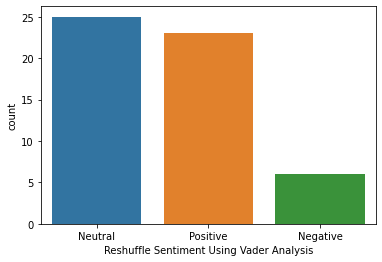

In [ ]:
sns.countplot(reshuffle['Reshuffle Sentiment Using Vader Analysis'])

#TextBlob Sentiment

In [ ]:
#Create additional columns containing polarity score, subjectivity and overall sentiment 
sentiment=[]
subjectivity=[]
sentiment_score=[]
for i in reshuffle['content_casefold'].values:
  Tweet = TextBlob(i)
  sentiment_score.append(Tweet.sentiment[0])
  if Tweet.sentiment[0]<0:
    sentiment.append('Negative')
  elif Tweet.sentiment[0]>0:
    sentiment.append('Positive')
  else:
    sentiment.append('Neutral')
  subjectivity.append(Tweet.sentiment[1])

In [ ]:
reshuffle['Sentiment Score']=sentiment_score
reshuffle['Subjectivity']=subjectivity
reshuffle['Reshuffle Sentiment Using TextBlob Analysis']=sentiment

In [ ]:
px.histogram(data_frame=reshuffle,x='Sentiment Score',color='Reshuffle Sentiment Using TextBlob Analysis')

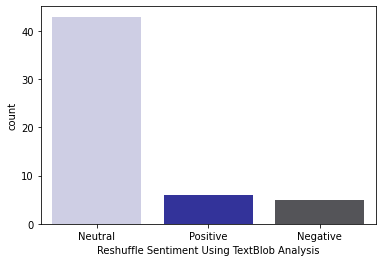

In [ ]:
sns.countplot(reshuffle['Reshuffle Sentiment Using TextBlob Analysis'], palette=['#cacae8','#2222ab','#535359'])

#KMeans Clustering

In [ ]:
#Fit transform the data
X=data_reshuffle.fit_transform(reshuffle['content_stemmed'].tolist())
pd.DataFrame(X.toarray(), columns=data_reshuffle.get_feature_names())

,13,14,14 juni,15,15 juni,20192024,2022,ada,afriansyah,agraria,...,wakil,wakil menteri,wamen,wartawan,wempi,wib,widodo,widodo jokowi,zulkifli,zulkifli hasan
0,0.000000,0.000000,0.000000,0.050538,0.051484,0.000000,0.043651,0.000000,0.102804,0.075279,...,0.154843,0.171908,0.000000,0.000000,0.099685,0.000000,0.059931,0.000000,0.070509,0.070509
1,0.000000,0.000000,0.000000,0.115429,0.117589,0.143223,0.123573,0.117131,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.074341,0.078235,0.075129,0.076535,0.000000,0.100007,0.076237,0.000000,0.000000,...,0.056972,0.063251,0.000000,0.000000,0.000000,0.000000,0.089092,0.000000,0.000000,0.000000
3,0.000000,0.074256,0.078146,0.000000,0.000000,0.000000,0.064816,0.159809,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.087423,0.052559,0.000000,0.000000,0.000000
4,0.103790,0.140143,0.087106,0.083648,0.050328,0.103790,0.072248,0.000000,0.000000,0.073589,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099194,0.097447,0.000000,0.000000
5,0.000000,0.109487,0.115222,0.065350,0.066573,0.000000,0.079551,0.000000,0.000000,0.057492,...,0.049556,0.055018,0.000000,0.000000,0.000000,0.076131,0.077495,0.000000,0.140515,0.140515
6,0.000000,0.077460,0.081517,0.046234,0.047099,0.000000,0.067612,0.000000,0.000000,0.068867,...,0.059362,0.065904,0.000000,0.100481,0.000000,0.091194,0.054826,0.091194,0.153925,0.153925
7,0.000000,0.053669,0.000000,0.054238,0.032633,0.000000,0.027668,0.000000,0.000000,0.047716,...,0.098148,0.108964,0.000000,0.000000,0.000000,0.063185,0.000000,0.000000,0.044692,0.044692
8,0.000000,0.117481,0.000000,0.086913,0.071434,0.000000,0.060565,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049112,0.000000,0.000000,0.000000
9,0.000000,0.067959,0.071518,0.040563,0.041322,0.085216,0.059319,0.000000,0.082512,0.102301,...,0.153425,0.170334,0.082512,0.000000,0.080009,0.000000,0.048101,0.080009,0.056592,0.056592


In [ ]:
k_clusters = 10

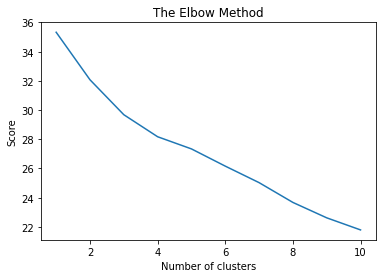

In [ ]:
score = []
for i in range(1,k_clusters + 1):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=100,n_init=5,random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1,k_clusters + 1 ),score)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.savefig('elbow.png')
plt.show()

In [ ]:
k_clusters = 4

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X)

KMeans(max_iter=600, n_clusters=4, random_state=0, tol=1e-06)

In [ ]:
clusters = model.predict(X)

In [ ]:
reshuffle["ClusterName"] = clusters
reshuffle.head(2)

,published,title_casefold,content_casefold,url,date,content_stopword,content_tokenized,content_stemmed,Negative Score,Positive Score,Neutral Score,Compound Score,Reshuffle Sentiment Using Vader Analysis,Sentiment Score,Subjectivity,Reshuffle Sentiment Using TextBlob Analysis,ClusterName
0,2022-06-15 11:07:05,reshuffle kabinet jokowi dapat sorotan media a...,presiden republik indonesia joko widodo mengum...,https://www.viva.co.id/berita/dunia/1485645-re...,2022-06-15,presiden republik indonesia joko widodo mengum...,"[presiden, republik, indonesia, joko, widodo, ...","['presiden', 'republik', 'indonesia', 'joko', ...",0.0,0.0,1.0,0.0,Neutral,0.0,0.0,Neutral,1
1,2022-06-02 12:48:27,ramai kabar reshuffle kabinet pertengahan juni...,menteri sekretaris negara mensesneg pratikno b...,https://www.viva.co.id/berita/nasional/1480959...,2022-06-02,menteri sekretaris negara mensesneg pratikno b...,"[menteri, sekretaris, negara, mensesneg, prati...","['menteri', 'sekretaris', 'negara', 'mensesneg...",0.0,0.0,1.0,0.0,Neutral,0.0,0.0,Neutral,3


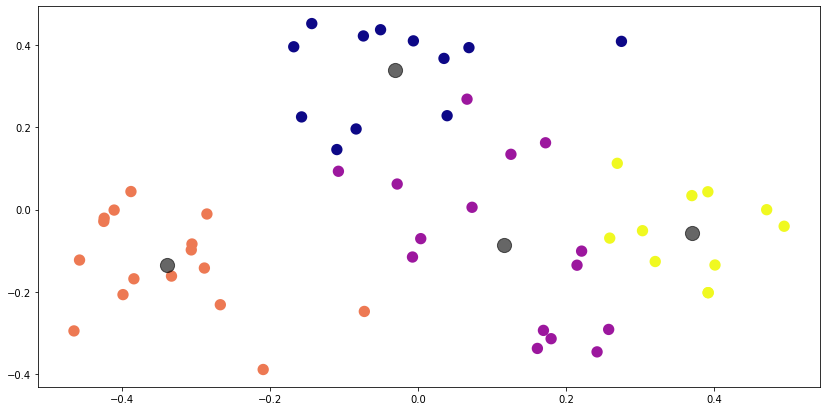

In [ ]:
sklearn_pca = PCA(n_components = 4)
Y_sklearn = sklearn_pca.fit_transform(X.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

plt.figure(figsize=(14, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='plasma', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [ ]:
kmeans_vector=data_reshuffle.fit_transform(reshuffle['content_stemmed'].values)
pca3 = PCA(n_components=10).fit_transform(kmeans_vector.todense())
px.scatter_3d(x=pca3[:,0],y=pca3[:,1],z=pca3[:,2],color=reshuffle['ClusterName'].values)

#Visualization

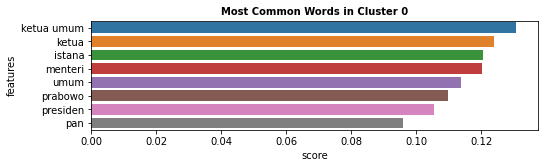

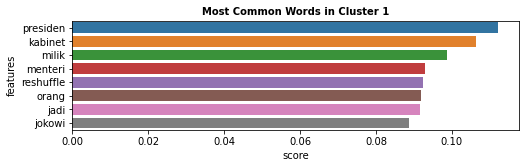

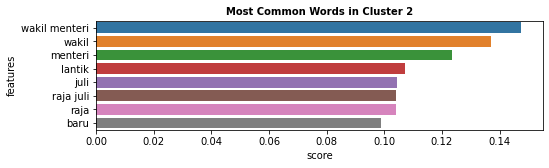

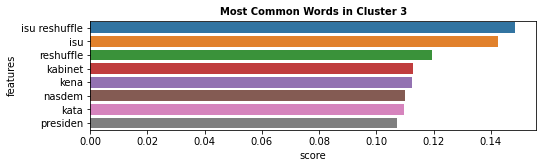

In [ ]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = data_reshuffle.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])

dfs = get_top_features_cluster(X.toarray(), prediction, 8)
plotWords(dfs, 8)

In [ ]:
reshuffle[reshuffle['ClusterName']==0]['content_stopword'].values[0]

'sejumlah menteri terlihat mendatangi istana kepresidenan jakarta selasa 14 juni 2022  tengah menguatnya isu perombakan  reshuffle kabinet salah satu  datang  menteri pertahanan prabowo subianto kedatangan prabowo  sempat luput  pantauan awak media  prabowo datang tak melalui pintu pilar istana negara jalur  biasanya dilalui  menteri prabowo masuk  pintu  berada  samping masjid baiturrahim kompleks istana kepresidenan jakarta awak media menyadari keberadaan prabowo  istana   ketua umum gerindra  keluar  pintu bali sekira pukul 1630 wib prabowo terlihat mengenakan kemeja lengan panjang berwarna putih  kesempatan  ketua umum partai gerindra prabowo subianto temui presiden jokowi kiri photo istimewa  keluar prabowo langsung menaiki mobil suv  langsung meninggalkan kompleks istana  diketahui apa  menjadi pembicaraan prabowo  presiden joko widodo  istana  prabowo   beberapa menteri lainnya  datang  istana presiden  antaranya menteri atrbpn sofyan djalil menteri perdagangan luthfi   mantan p

In [ ]:
reshuffle[reshuffle['ClusterName']==1]['content_stopword'].values[0]

'presiden republik indonesia joko widodo mengumumkan perombakan kabinetnya  rabu 15 juni 2022    beberapa media internasional turut menyoroti  tersebut media amerika serikat  us news menuliskan judul presiden indonesia pecat menteri perdagangan  gejolak ekspor minyak sawit us news menuliskan  presiden jokowi menunjuk seorang menteri perdagangan baru menyusul kontroversi serangkaian kebijakan flipflop  ekspor minyak sawit  upacara resmi  istana negara presiden jokowi melantik zukifli hasan ketua partai amanat nasional pan  mantan menteri kehutanan  menteri perdagangan negara berikutnya menteri perdagangan zulkifli hasan kedua  kiri photo  media as  menyorot  perombakan  terjadi  mantan menteri perdagangan muhammad lutfi menghadapi tekanan politik atas upaya kebijakan  menahan lonjakan harga minyak goreng domestik termasuk larangan mengejutkan pengiriman minyak sawit  eksportir terbesar dunia   media as media singapura  channel news asia  turut menyoroti perombakan kabinet jokowi tersebu

In [ ]:
reshuffle[reshuffle['ClusterName']==2]['content_stopword'].values[0]

'presiden joko widodo  jokowi mengumpulkan  ketua umum partai politik pendukung jokowimaruf amin jelang reshuffle kabinet  pelantikan menteri baru kabinet joko widodomaruf amin  istana negara  rabu 15 juni 2022 pantauan sejumlah ketua umum  tokoh parpol  bertahap  berdatangan  istana  memenuhi undangan presiden jokowi    tiba  istana ketum partai nasdem surya paloh disusul ketum pdip megawati soekarnoputri     ketum partai gerindra prabowo subianto ketum pkb muhaimin iskandar  tiba pukul 1140 wib   ketum partai golkar airlangga hartarto  tiba  pukul 1143 wib kemudian disusul ketum pan zulkifli hasan  ketum ppp suharso monoarfa  tokoh ketum parpol  kemudian diarahkan menuju presidential lounge  acara jamuan makan siang selanjutnya   menghadiri acara pelantikan menteri  wakil menteri baru kabinet jokowimaruf amin  siang   informasi  beredar acara pelantikan pejabat negara   mulai dilakukan  pukul 1330 wib  diketahui presiden jokowi  memanggil ketiga menterinya  prabowo subianto menteri p

In [ ]:
reshuffle[reshuffle['ClusterName']==3]['content_stopword'].values[0]

'menteri sekretaris negara mensesneg pratikno buka suara mengenai kabar reshuffle kabinet   dilakukan  15 juni 2022 pratikno mengungkapkan   dilakukan reshuffle kabinet  tersebut sematasemata  adanya upaya responsif mengatasi permasalahan    kan fokus  banyak sekali permasalahan   ditangani  cepat ekonomi global sangat dinamis   sangat responsif kata pratikno  gedung dpr kompleks parlemen senayan jakarta kamis 2 juni 2022 ilustrasi jajaran menteri kabinet indonesia maju periode 20192024 photo  fotopuspa perwitasari  pratikno pemerintah terus mengambil langkahlangkah antisipatif  pandemi covid19  dampaknya   jajaran kabinet  fokus bekerja mengendalikan penyebaran covid19 pandemi    antisipatif jadi  fokus kerja ujarnya kendati  pratikno  memastikan  reshuffle kabinet dilakukan  15 juni 2022 mendatang termasuk menterimenteri   terkena reshuffle  berjanji  membocorkan  masyarakat    jadwal resmi reshuffle   kalau   jadwal bocorin dikitdikit kata pratikno isu reshuffle kabinet sebenarnya  

In [ ]:
reshuffle.to_excel("reshuffle_final.xlsx")

##Creating Clean Stopwords

In [ ]:
#Create factory
factory = StopWordRemoverFactory().get_stop_words()
more_stopword = ['presiden', 'reshuffle','joko','widodo',
                 'jokowi','joko widodo','reshuffle','reshuflle','republik','indonesia','menteri']
 
data1 = factory + more_stopword
dictionary = ArrayDictionary(data1)
ste = StopWordRemover(dictionary)

def stopwords_removal(words):
    return [word for word in words if word not in data1]

reshuffle['content_clean_stopword'] = reshuffle['content_tokenized'].apply(stopwords_removal)

In [ ]:
reshuffle['content_clean_stopword'] = reshuffle['content_clean_stopword'].apply(lambda x: ''.join(str(x)))

In [ ]:
reshuffle['content_clean_stopword']

0     ['mengumumkan', 'perombakan', 'kabinetnya', 'r...
1     ['sekretaris', 'negara', 'mensesneg', 'pratikn...
2     ['isu', 'perombakan', 'kabinetnya', 'dikabarka...
3     ['sejumlah', 'terlihat', 'mendatangi', 'istana...
4     ['menjadi', 'perbincangan', 'hangat', 'wargane...
5     ['acak', 'ulang', 'kabinet', 'dikabarkan', 'di...
6     ['ketua', 'dpp', 'pan', 'bima', 'arya', 'optim...
7     ['kabar', 'terus', 'mencuat', 'beberapa', 'har...
8     ['melakukan', 'alias', 'perombakan', 'kabinet'...
9     ['melakukan', 'kabinet', 'maju', 'melantik', '...
10    ['melakukan', 'kabinet', 'beberapa', 'salah', ...
11    ['wakil', 'ketua', 'umum', 'partai', 'kebangki...
12    ['pertanian', 'syahrul', 'yasin', 'limpo', 'me...
13    ['isu', 'mengenai', 'dilakukannya', 'acak', 'u...
14    ['dikabarkan', 'bakal', 'melakukan', 'kabinet'...
15    ['mengumpulkan', 'ketua', 'umum', 'partai', 'p...
16    ['partai', 'amanat', 'nasional', 'pan', 'menga...
17    ['ketua', 'dpr', 'ri', 'puan', 'maharani',

In [ ]:
reshuffle.dtypes['content_clean_stopword']

dtype('O')

In [ ]:
def wc_reshuffle(reshuffle,label_col,label):
    # Set figure size
    plt.figure(figsize=(20,12))
    
    # Combine all text as one for a given label
    text = ''.join(reshuffle[reshuffle[label_col]==label]['content_clean_stopword'].values)

    stop_words = reshuffle['content_clean_stopword']

    # Create a wordcloud
    wc = WordCloud(stopwords=stop_words, height=400,width=1000,background_color="white").generate(text)
    
    # Display the image
    plt.imshow(wc)
    
    # set axis off
    plt.axis("off")
    
    # show image
    plt.show()

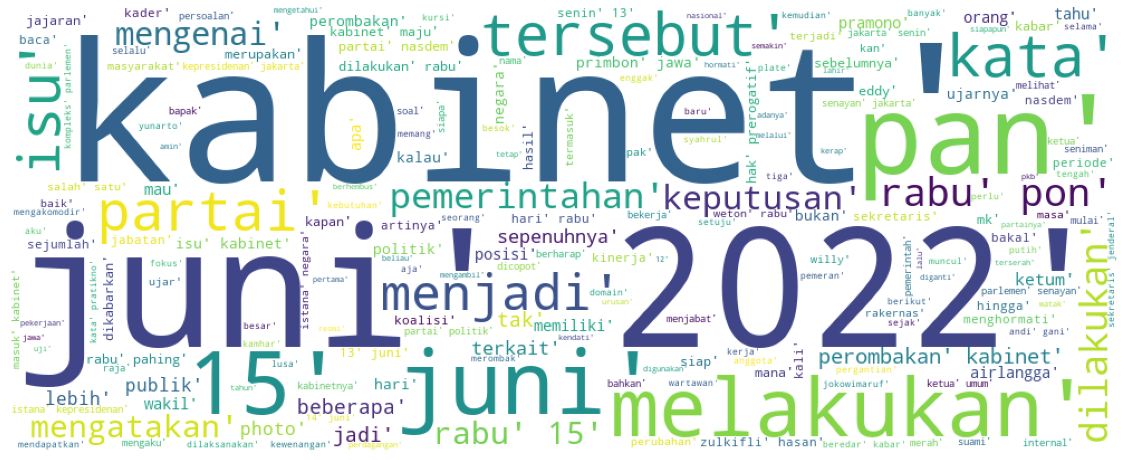

In [ ]:
wc_reshuffle(reshuffle,'ClusterName',3)

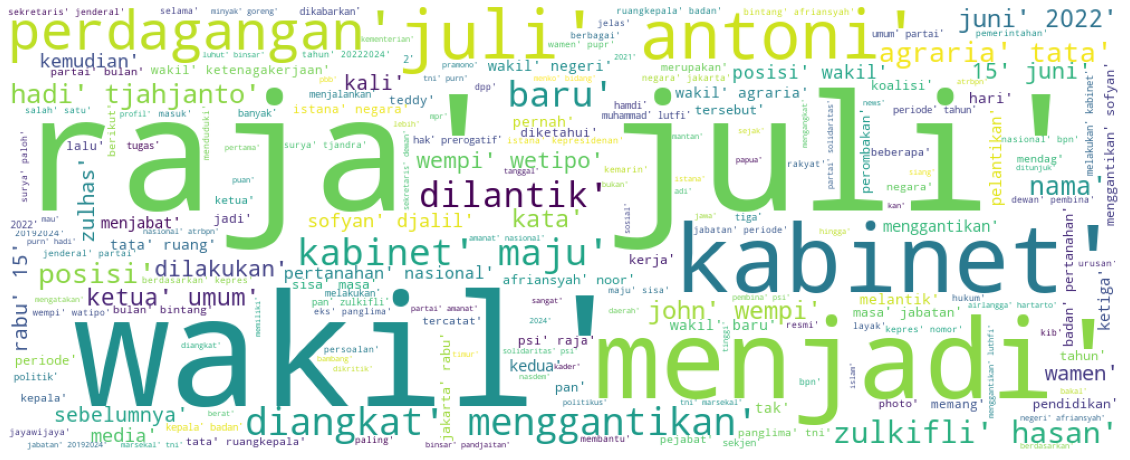

In [ ]:
wc_reshuffle(reshuffle,'ClusterName',1)

In [ ]:
all_words = reshuffle['content_clean_stopword'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Frequent Occuring word (unclean) in Headlines'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')


In [ ]:
reshuffle.content_clean_stopword

0     ['mengumumkan', 'perombakan', 'kabinetnya', 'r...
1     ['sekretaris', 'negara', 'mensesneg', 'pratikn...
2     ['isu', 'perombakan', 'kabinetnya', 'dikabarka...
3     ['sejumlah', 'terlihat', 'mendatangi', 'istana...
4     ['menjadi', 'perbincangan', 'hangat', 'wargane...
5     ['acak', 'ulang', 'kabinet', 'dikabarkan', 'di...
6     ['ketua', 'dpp', 'pan', 'bima', 'arya', 'optim...
7     ['kabar', 'terus', 'mencuat', 'beberapa', 'har...
8     ['melakukan', 'alias', 'perombakan', 'kabinet'...
9     ['melakukan', 'kabinet', 'maju', 'melantik', '...
10    ['melakukan', 'kabinet', 'beberapa', 'salah', ...
11    ['wakil', 'ketua', 'umum', 'partai', 'kebangki...
12    ['pertanian', 'syahrul', 'yasin', 'limpo', 'me...
13    ['isu', 'mengenai', 'dilakukannya', 'acak', 'u...
14    ['dikabarkan', 'bakal', 'melakukan', 'kabinet'...
15    ['mengumpulkan', 'ketua', 'umum', 'partai', 'p...
16    ['partai', 'amanat', 'nasional', 'pan', 'menga...
17    ['ketua', 'dpr', 'ri', 'puan', 'maharani',